# PR EDA

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드

In [2]:
# 데이터 로드
df = pd.read_csv('PR_datasheet.csv')
df.head()

,PRODUCT,VISCOSITY,THICKNESS,RPM,SOFT BAKE TIME(),PEB TIME(m),DEVELOPMENT TIME(m)
0,SU-8 2,45,1.5,3000,1,1,1
1,SU-8 2,45,2.0,2000,3,1,1
2,SU-8 2,45,5.0,1000,3,1,1
3,SU-8 5,290,5.0,3000,3,1,1
4,SU-8 5,290,7.0,2000,5,1,1


### 기본 통계량 확인

In [3]:
print("=== Thickness 기본 통계량 ===")
print(df['THICKNESS'].describe())
print("\n")

=== Thickness 기본 통계량 ===
count     40.000000
mean      70.962500
std       65.989159
min        1.500000
25%       24.000000
50%       52.500000
75%      102.500000
max      260.000000
Name: THICKNESS, dtype: float64




### 상관관계 분석

In [6]:
numeric_columns = ['VISCOSITY', 'THICKNESS', 'RPM', 'SOFT BAKE TIME()', 'PEB TIME(m)', 'DEVELOPMENT TIME(m)']
correlation_matrix = df[numeric_columns].corr()
print("=== Thickness와의 상관계수 ===")
print(correlation_matrix['THICKNESS'].sort_values(ascending=False))
print("\n")


=== Thickness와의 상관계수 ===
THICKNESS              1.000000
DEVELOPMENT TIME(m)    0.959335
PEB TIME(m)            0.949071
SOFT BAKE TIME()       0.943220
VISCOSITY              0.757374
RPM                   -0.472334
Name: THICKNESS, dtype: float64




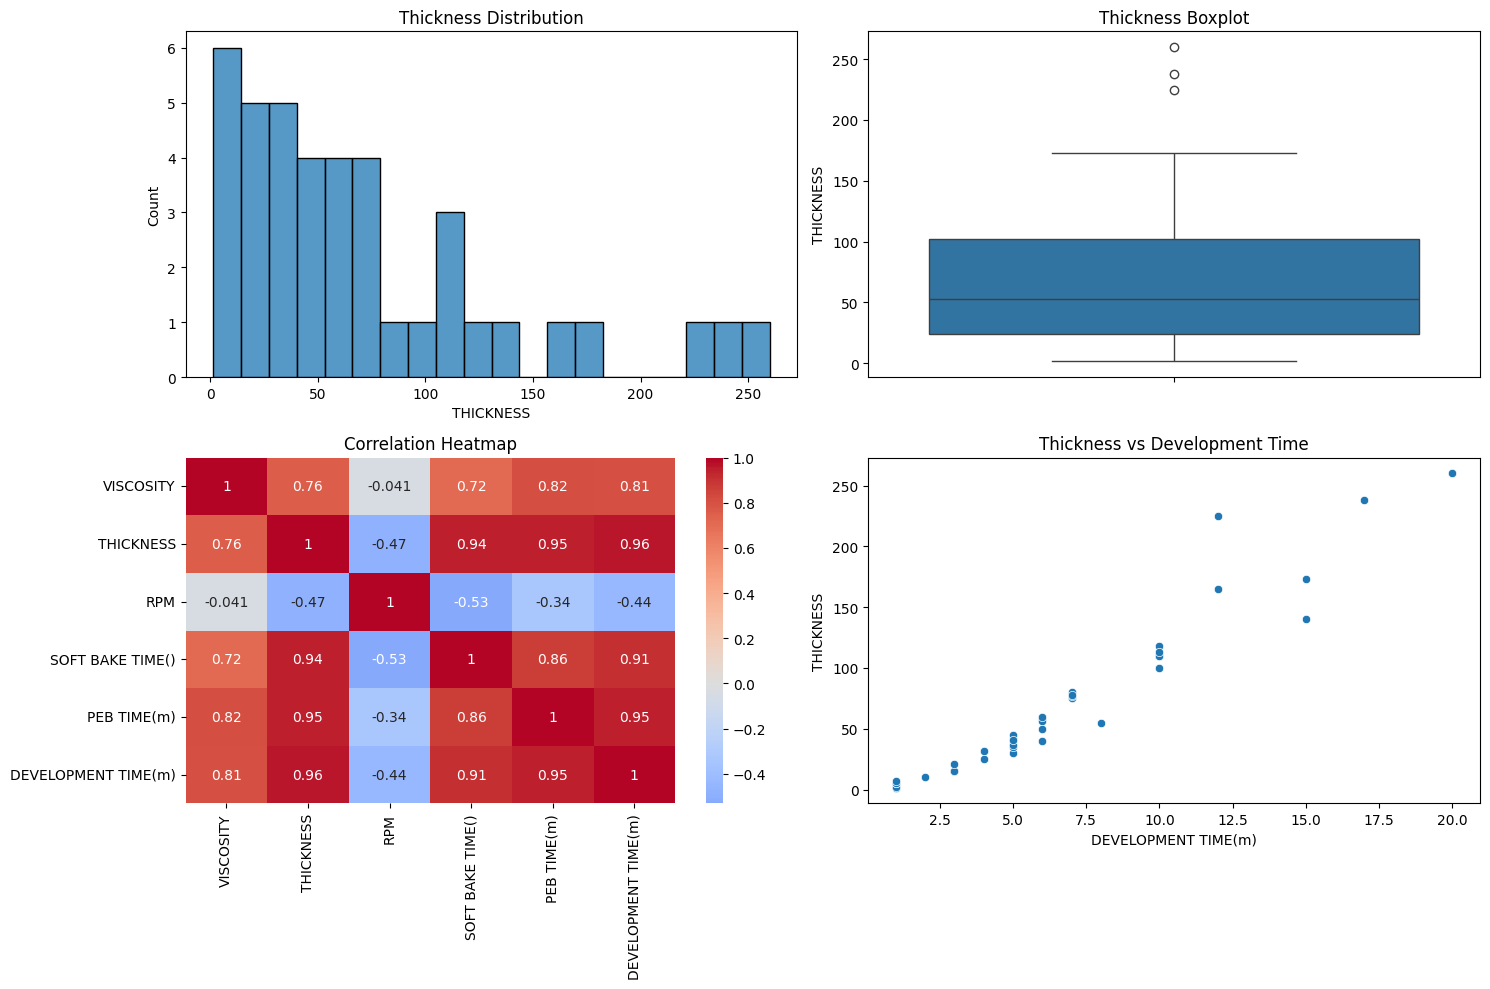

In [7]:
# 시각화
plt.figure(figsize=(15, 10))

# 히스토그램
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='THICKNESS', bins=20)
plt.title('Thickness Distribution')

# 박스플롯
plt.subplot(2, 2, 2)
sns.boxplot(y=df['THICKNESS'])
plt.title('Thickness Boxplot')

# 상관관계 히트맵
plt.subplot(2, 2, 3)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Thickness vs 가장 상관관계가 높은 변수의 산점도
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='DEVELOPMENT TIME(m)', y='THICKNESS')
plt.title('Thickness vs Development Time')

plt.tight_layout()
plt.show()

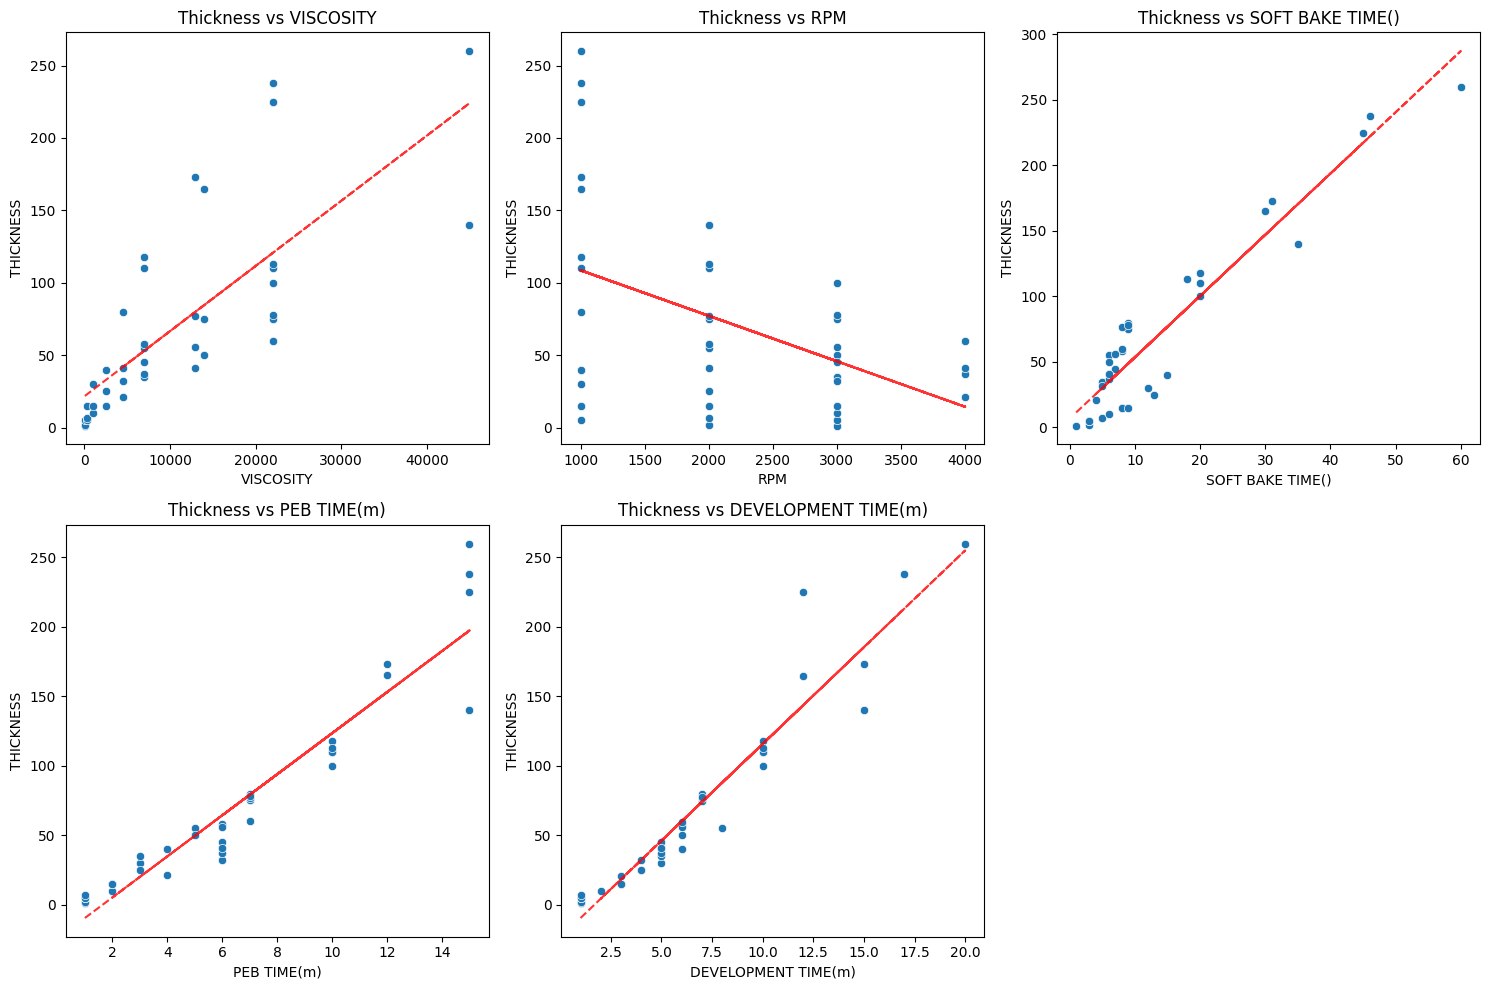

In [16]:
# 시각화 2: 산점도
plt.figure(figsize=(15, 10))
plot_vars = [var for var in numeric_columns if var != 'THICKNESS']
for i, column in enumerate(plot_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=column, y='THICKNESS')
    plt.title(f'Thickness vs {column}')
    
    # 회귀선 추가
    x = df[column]
    y = df['THICKNESS']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

### OLS 회귀분석

In [17]:
# 독립변수와 종속변수 설정
X = df[['VISCOSITY', 'RPM', 'SOFT BAKE TIME()', 'PEB TIME(m)', 'DEVELOPMENT TIME(m)']]
y = df['THICKNESS']

In [21]:
# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X).fit()

# 결과 출력
print("=== OLS 회귀분석 결과 ===")
print(model.summary())

=== OLS 회귀분석 결과 ===
                            OLS Regression Results                            
Dep. Variable:              THICKNESS   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     198.5
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           3.90e-24
Time:                        15:07:48   Log-Likelihood:                -155.68
No. Observations:                  40   AIC:                             323.4
Df Residuals:                      34   BIC:                             333.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

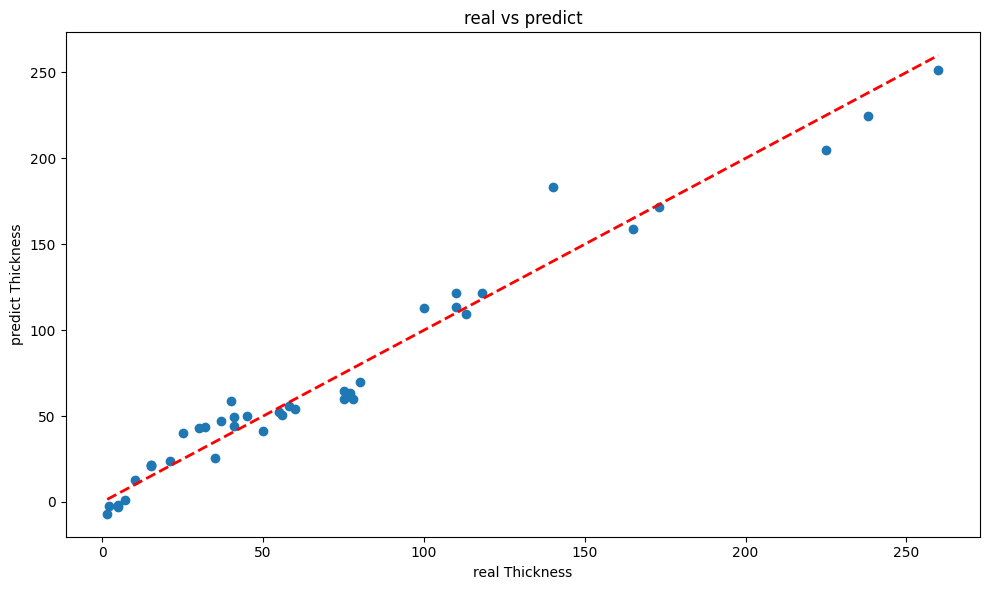

In [25]:
# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('real Thickness')
plt.ylabel('predict Thickness')
plt.title('real vs predict')
plt.tight_layout()
plt.show()
